# Sending emails using `smtplib`

- To send basic emails, we have the python `smtplib` package.

- To add attachments, set HTML content and improve functionality, we have the `email` package.

- Here is the reference tutorial for more information: [RealPython's article](https://realpython.com/python-send-email/).

- In the following examples, we shall make use of Gmail's SMTP service. A similar service will be available for other email providers as well.

## Setting up Gmail to send email programatically

- The easiest way to do this is the following:

    - Set an **App Password** for your gmail account.
    
    - This allows your code to send email through the gmail's SMTP service.
    
    - For each individual device, you have create an *app password*, and use that in your code.
    
- For [this article](https://support.google.com/accounts/answer/185833?hl=en) to setup an app password. (See the **Create & Use App Passwords** section) 

> **NOTE:** An app password will be shown only once, so, store it somewhere within your device.

> **NOTE:** An app password will be unique to each device and generating it is a one-time setup for that device.

- In this example, we are creating a `.env` file in the same directory as this notebook which will hold the following information:

```
EMAIL="SENDER_EMAIL_ADDRESS"
APP_PASSWORD="APP_PASSWORD_FOR_THE_DEVICE"
EMAIL_HOST="smtp.gmail.com"
EMAIL_PORT="465"
```

- In your python code, we shall use this `.env` file to securely load the credentials and use these for sending emails.

## A side-note about security

- When you send emails through Python, you should make sure that your SMTP connection is encrypted, so that your message and login credentials are not easily accessed by others. 

- **SSL** (Secure Sockets Layer) and **TLS** (Transport Layer Security) are two protocols that can be used to encrypt an SMTP connection.

- A common way is to start an SMTP connection that is secured from the beginning using `SMTP_SSL()` method on the `smtplib` library. Doing this will allow Gmail to encrypt the things using **TLS**.

- Now, a recommended step is to use `create_default_context()` from the `ssl` module. This will load the system’s trusted CA certificates, enable host name checking and certificate validation, and try to choose reasonably secure protocol and cipher settings.

- `smtplib` is Python’s built-in module for sending emails to any Internet machine with an SMTP or ESMTP listener daemon.

- Gmail requires us to use port `465` while using `SMTP_SSL()`.

## Sending Plain-Text emails

- The simplest form is to send plain-text emails.

- We first create a `server` object using the `SMTP_SSL()` method, using the following syntax:<br> `server = SMTP_SSL(host, port, context = context_object_using_ssl_module)`.

- This creates a secure TLS-encrypted connection.

- Since we again have to manually close the connection, we use the following block of code:<br>

```python
with smtplib.SMTP_SSL("smtp.gmail.com", port, context=context) as server:
    # DO STUFF HERE
```

- After this, we first login with our email and password (app-password in our case) on the server object. We use the following syntax: `server.login(email_as_string, password_as_string)`

- After this, we send the email using `server.sendmail()` method using the following syntax: `server.sendmail(sender_email,  receiver_email, message_as_string)`.

In [3]:
# sending a plain-text email
import smtplib, ssl
import os
from dotenv import load_dotenv

# get env vars from .env file and read credentials
load_dotenv()

email, password = os.environ.get('EMAIL'), os.environ.get('APP_PASSWORD')
host, port = os.environ.get('EMAIL_HOST'), os.environ.get('EMAIL_PORT')

# create context
context = ssl.create_default_context()

with smtplib.SMTP_SSL(host, port, context=context) as server:
    server.login(email, password)
    message = 'Hello from Python'
    try:
        server.sendmail(email, 'yogendrasai02@gmail.com', message)
        print('Email Sent!')
    except Exception as err:
        print('Error while sending email')
        print(err)

Email Sent!


- The above piece of code will send a plain-text email with no subject, just some text content.
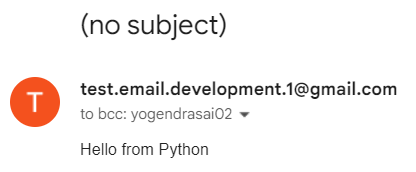

- To send an email which has some subject, some attachments, maybe some HTML, we make use of the python `email` package. Follow the real python's article for doing so.

## Using transactional email services & Fake Emails

- You might want to use a service like [Mailtrap](https://mailtrap.io/), which traps all your sent email so that they donot reach the intended inbox. 

- You might want to use a service like [Sendinblue](https://www.sendinblue.com/). It has a free tier which can send upto 300 free emails per day.

- You might want to use a fake email service, such as [temp-mail](https://temp-mail.org/en/).

- For more such services, see the RealPython's article or search google :)